<a href="https://colab.research.google.com/github/sonmanwoo/Hellow_AMP_PJT/blob/main/examples/PyCaret%202%20Regression%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.3.1. Last updated : 03-06-2021 (SMW)

In [ ]:
!pip install shap
!pip install pycaret

In [ ]:
# check version
from pycaret.utils import version
version()

'2.3.1'

# 1.a Loading Dataset

In [ ]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [ ]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


# 3. Compare Baseline

In [ ]:
top5 = compare_models(fold=5, sort='MAE', n_select=5, exclude=['knn','en'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2670.1805,2.301187e+07,4793.9265,0.8392,0.4427,0.3133,0.086
rf,Random Forest Regressor,2765.6686,2.519275e+07,5016.5399,0.8229,0.4790,0.3418,0.580
et,Extra Trees Regressor,2771.2244,2.835366e+07,5314.0915,0.8031,0.4903,0.3303,0.530
lightgbm,Light Gradient Boosting Machine,3018.9895,2.551501e+07,5049.8492,0.8192,0.5534,0.3876,0.140
dt,Decision Tree Regressor,3248.7912,4.530322e+07,6727.9920,0.6799,0.5487,0.3654,0.022
huber,Huber Regressor,3464.7408,4.901440e+07,6985.6087,0.6602,0.4849,0.2174,0.048
llar,Lasso Least Angle Regression,4326.7373,3.852320e+07,6194.6384,0.7345,0.6004,0.4409,0.022
lasso,Lasso Regression,4332.6330,3.854390e+07,6196.6074,0.7343,0.6404,0.4416,0.016
lar,Least Angle Regression,4332.7643,3.854994e+07,6197.0828,0.7343,0.6368,0.4415,0.018
lr,Linear Regression,4332.7660,3.854995e+07,6197.0843,0.7343,0.6369,0.4415,0.628


# 4. Create Model

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9328,2.405890e+07,4904.9870,0.8563,0.6083,0.3985
1,3080.5341,2.929976e+07,5412.9250,0.8296,0.4459,0.3268
2,3022.2314,2.762456e+07,5255.9074,0.6502,0.6822,0.4361
3,3146.2421,2.501896e+07,5001.8954,0.7911,0.6398,0.5095
4,3154.6899,2.889451e+07,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,2.143249e+07,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,2.078582e+07,4559.1464,0.8586,0.3891,0.3070
7,2678.3617,2.423274e+07,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,2.141867e+07,4628.0305,0.8617,0.5574,0.4101
9,3273.2286,2.959838e+07,5440.4390,0.8094,0.5916,0.3804


# 5. Tune Hyperparameters

In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2538.9092,1.987114e+07,4457.7054,0.8813,0.4439,0.3033
1,3013.2745,2.810900e+07,5301.7924,0.8366,0.4383,0.3220
2,2673.0605,2.314639e+07,4811.0694,0.7069,0.5098,0.3692
3,2970.9513,2.184692e+07,4674.0694,0.8176,0.5098,0.4347
4,2987.4854,2.759659e+07,5253.2457,0.7948,0.4961,0.2944
5,2497.1694,1.708457e+07,4133.3489,0.8901,0.3415,0.2562
6,2578.9341,2.019312e+07,4493.6755,0.8626,0.4359,0.3445
7,2725.4137,2.441447e+07,4941.1003,0.8658,0.4635,0.2823
8,2444.7761,1.969417e+07,4437.8113,0.8728,0.4316,0.3507
9,3012.4384,2.760386e+07,5253.9375,0.8222,0.4918,0.3352


In [ ]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=56, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=160, n_jobs=-1, num_leaves=256, objective=None,
              random_state=123, reg_alpha=0.2, reg_lambda=0.005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#6. Ensemble Model Intro
<img src=https://cdn.corporatefinanceinstitute.com/assets/ensemble-methods.png  width="400" height="200">  
Bagging과 Boosting이 기억나시나요?  
Bagging : 10명이 동시에 문제를 풀어 답을 구함  
Boosting : 10명이 순서대로 문제를 풀어 답을 구함

<img src=https://miro.medium.com/max/1416/1*ZYbqZcnzL1CT3ug9wQgY0Q.png  width="400" height="200"> 

Stacking : 1차 모델이 예측한 결과를 통해 2차 모델이 재학습하여 결과를 산출하는 방법
<img src=https://miro.medium.com/max/2704/1*iCFqUkCpYN-X8DUPafVvSw.png  width="800" height="200">

#6. Ensemble Model

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2852.7199,3.511235e+07,5925.5673,0.7903,0.4824,0.2888
1,3401.1735,4.989040e+07,7063.3139,0.7099,0.5605,0.3398
2,3176.5034,4.595292e+07,6778.8583,0.4182,0.6314,0.4319
3,2988.7287,4.282237e+07,6543.8803,0.6424,0.6063,0.5683
4,4292.8630,6.600624e+07,8124.4226,0.5091,0.6912,0.5817
5,3426.3194,4.466754e+07,6683.3782,0.7127,0.5049,0.3174
6,2841.3924,4.231651e+07,6505.1138,0.7121,0.3693,0.2099
7,2606.5135,3.460754e+07,5882.8171,0.8097,0.4640,0.1677
8,2901.3826,3.959546e+07,6292.4922,0.7443,0.5111,0.4387
9,3469.8779,5.016079e+07,7082.4280,0.6769,0.5728,0.3664


In [ ]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2651.3058,2.229638e+07,4721.9041,0.8668,0.4714,0.3330
1,2812.4691,3.041629e+07,5515.0967,0.8231,0.4591,0.2754
2,2799.1765,2.458000e+07,4957.8221,0.6888,0.5474,0.3983
3,2892.6780,2.538560e+07,5038.4124,0.7880,0.5221,0.4219
4,3032.4577,3.057809e+07,5529.7455,0.7726,0.5603,0.3763
5,2814.3615,2.282611e+07,4777.6676,0.8532,0.3693,0.2575
6,2537.5853,2.202323e+07,4692.8910,0.8501,0.3761,0.2897
7,2631.0993,2.451999e+07,4951.7667,0.8652,0.4371,0.2423
8,2279.0838,1.800768e+07,4243.5459,0.8837,0.4285,0.3414
9,2841.6183,2.916250e+07,5400.2319,0.8122,0.5070,0.3475


In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2187.8544,2.706930e+07,5202.8168,0.8383,0.4491,0.2355
1,2445.9963,3.394340e+07,5826.0969,0.8026,0.4534,0.1989
2,2205.5794,2.540586e+07,5040.4226,0.6783,0.5327,0.3468
3,2745.9929,3.559018e+07,5965.7509,0.7028,0.5025,0.3488
4,3129.6077,4.229515e+07,6503.4719,0.6854,0.5995,0.3684
5,2532.5954,2.987319e+07,5465.6376,0.8078,0.4339,0.2080
6,1830.0139,2.053472e+07,4531.5255,0.8603,0.3433,0.1379
7,2197.8139,2.752994e+07,5246.8979,0.8486,0.4505,0.1709
8,1837.9262,1.872614e+07,4327.3714,0.8790,0.3379,0.2146
9,3071.6495,4.650448e+07,6819.4193,0.7005,0.6260,0.5135


# 7. Blend Models
알고리즘 마다 특성이 다릅니다.
결과가 우수한 5개의 알고리즘을 Blending하여 Model을 만들어봅시다.


In [ ]:
tuned_top5 = [tune_model(i) for i in top5]
blender_top5 = blend_models(estimator_list=tuned_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2336.7377,1.930123e+07,4393.3168,0.8847,0.4270,0.2784
1,2761.0974,2.938357e+07,5420.6612,0.8292,0.4228,0.2591
2,2459.4602,2.152502e+07,4639.5062,0.7275,0.4949,0.3167
3,2637.8606,2.144621e+07,4631.0054,0.8209,0.4813,0.3539
4,2725.4406,2.723991e+07,5219.1868,0.7974,0.5162,0.2878
5,2497.8247,1.890796e+07,4348.3281,0.8784,0.3353,0.2298
6,2264.8467,1.888355e+07,4345.5202,0.8715,0.3391,0.2407
7,2448.3323,2.362568e+07,4860.6250,0.8701,0.4263,0.2149
8,2254.5448,1.879098e+07,4334.8564,0.8786,0.4065,0.3077
9,2673.7264,2.630692e+07,5129.0272,0.8306,0.4800,0.3013


# 8. Stack Models

In [ ]:
stacker = stack_models(estimator_list = tuned_top5[1:], meta_model = tuned_top5[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2753.9819,2.421999e+07,4921.3806,0.8553,0.5052,0.3277
1,3187.6021,3.399194e+07,5830.2604,0.8024,0.5748,0.3961
2,3308.8100,2.925415e+07,5408.7104,0.6296,0.6862,0.4228
3,3105.1668,2.443407e+07,4943.0832,0.7960,0.5442,0.4522
4,3460.9605,3.579277e+07,5982.7058,0.7338,0.8953,0.4051
5,2828.9201,1.950548e+07,4416.5003,0.8745,0.4329,0.3024
6,2749.0751,2.097150e+07,4579.4653,0.8573,0.5114,0.3349
7,2921.8159,2.865884e+07,5353.3950,0.8424,0.7004,0.3251
8,3030.6736,2.779702e+07,5272.2881,0.8205,0.5484,0.3526
9,2900.2042,2.890932e+07,5376.7385,0.8138,0.5626,0.3847


# 9. Analyze Model

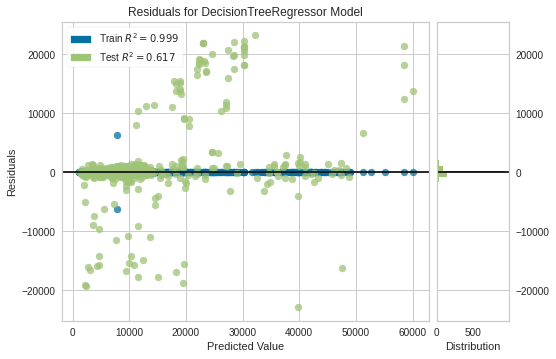

In [ ]:
plot_model(dt)

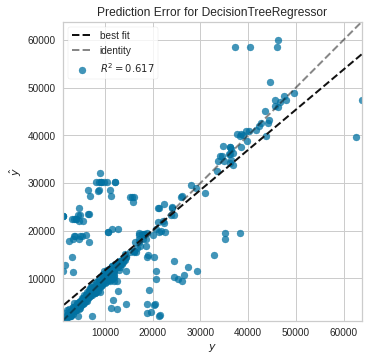

In [ ]:
plot_model(dt, plot = 'error')

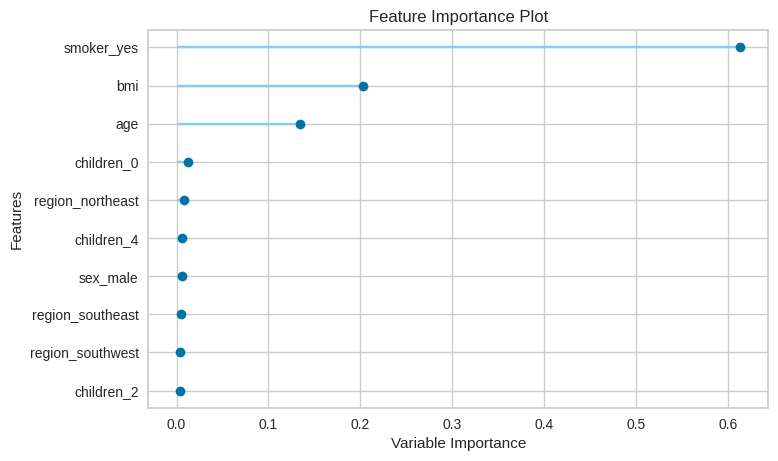

In [ ]:
plot_model(dt, plot = 'feature')

In [ ]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

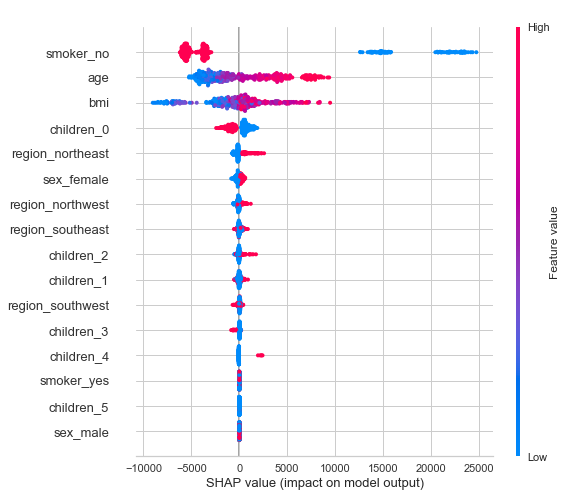

In [ ]:
interpret_model(lightgbm)

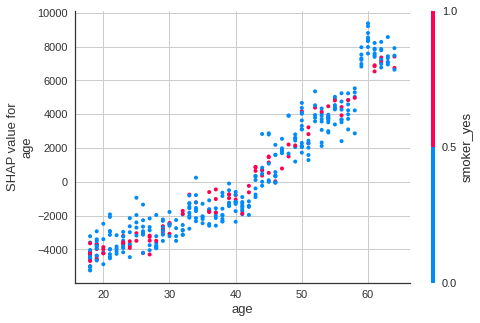

In [ ]:
interpret_model(lightgbm, plot = 'correlation')

In [ ]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [ ]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12. Predict Model

In [ ]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,2.068683e+07,4548.2773,0.8552,0.5223,0.3678


,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9800.888672,9363.966518
1,32.0,37.334999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4667.607422,10393.493570
2,27.0,31.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.871094,35628.993319
3,35.0,24.129999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5125.215820,6926.826747
4,60.0,25.740000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12142.578125,17508.278269


In [ ]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,16884.923828
1,18,male,33.770,1,no,southeast,1727.540039
2,28,male,33.000,3,no,southeast,4449.461914
3,33,male,22.705,0,no,northwest,21984.470703
4,32,male,28.880,0,no,northwest,3866.855225


# 13. Save / Load Model

In [ ]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [ ]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='charges')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [ ]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [ ]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [ ]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.57,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
get_config('seed')

123

In [ ]:
from pycaret.regression import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
!mlflow ui

[2021-05-27 02:55:16 +0000] [590] [INFO] Starting gunicorn 20.1.0
[2021-05-27 02:55:16 +0000] [590] [INFO] Listening at: http://127.0.0.1:5000 (590)
[2021-05-27 02:55:16 +0000] [590] [INFO] Using worker: sync
[2021-05-27 02:55:16 +0000] [593] [INFO] Booting worker with pid: 593


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org